In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
import warnings
warnings.filterwarnings('ignore')


In [40]:
df=pd.read_csv("dataset/water_potability.csv", delimiter=",",index_col=False)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [142]:
from pandas.plotting import table
df.describe().style.background_gradient(cmap = "Blues")


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


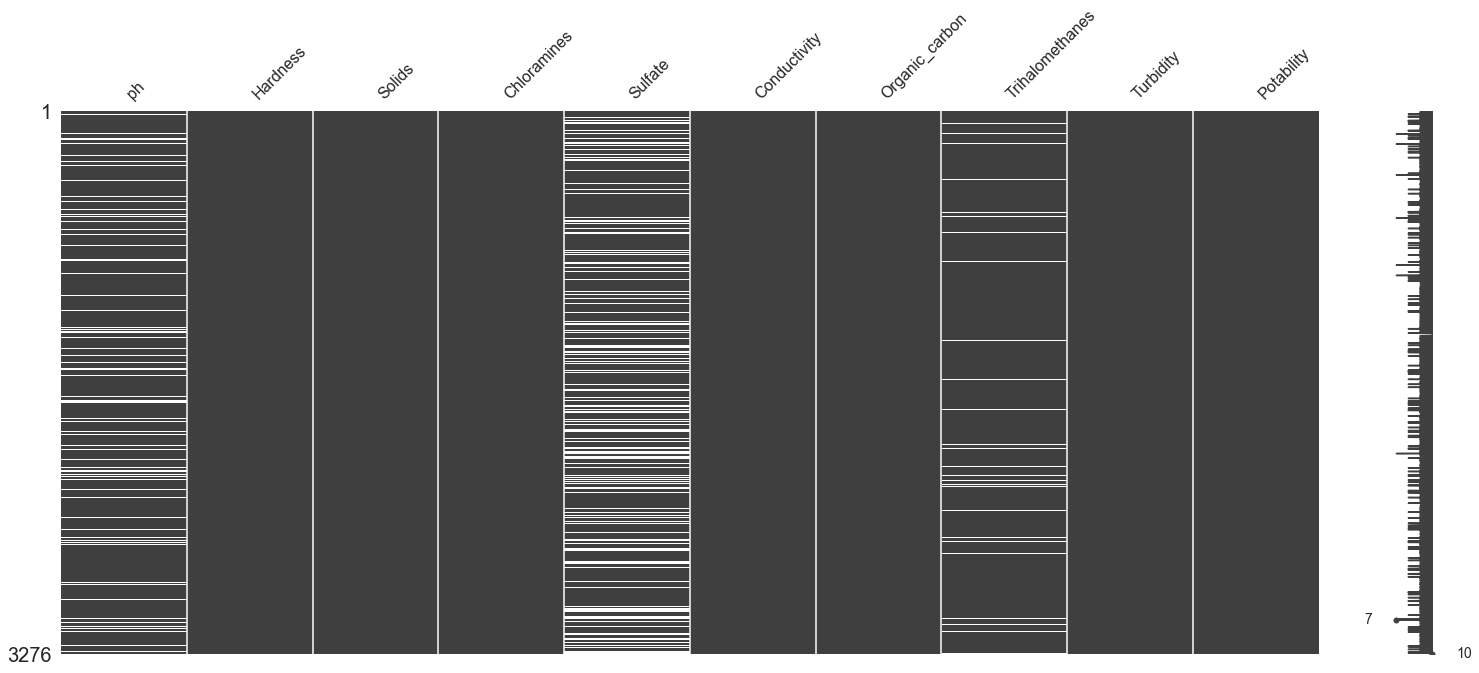

In [143]:
# Find out the missing data
msno.matrix(df)
plt.savefig('Media/missing_value.png')
plt.show()

In [44]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [45]:
from sklearn.impute import KNNImputer

# Use K-Nearest Method to fill up the missing values
imputer = KNNImputer(n_neighbors=20, weights="uniform")
fitted_df=imputer.fit_transform(df)
df1=pd.DataFrame(fitted_df,columns=df.columns)
df1


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.585666,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.993634,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,323.240588,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,326.904351,392.449580,19.903225,67.157628,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,335.990170,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,344.831137,402.883113,11.168946,77.488213,4.708658,1.0


In [46]:
# Check the fitting result
df1.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

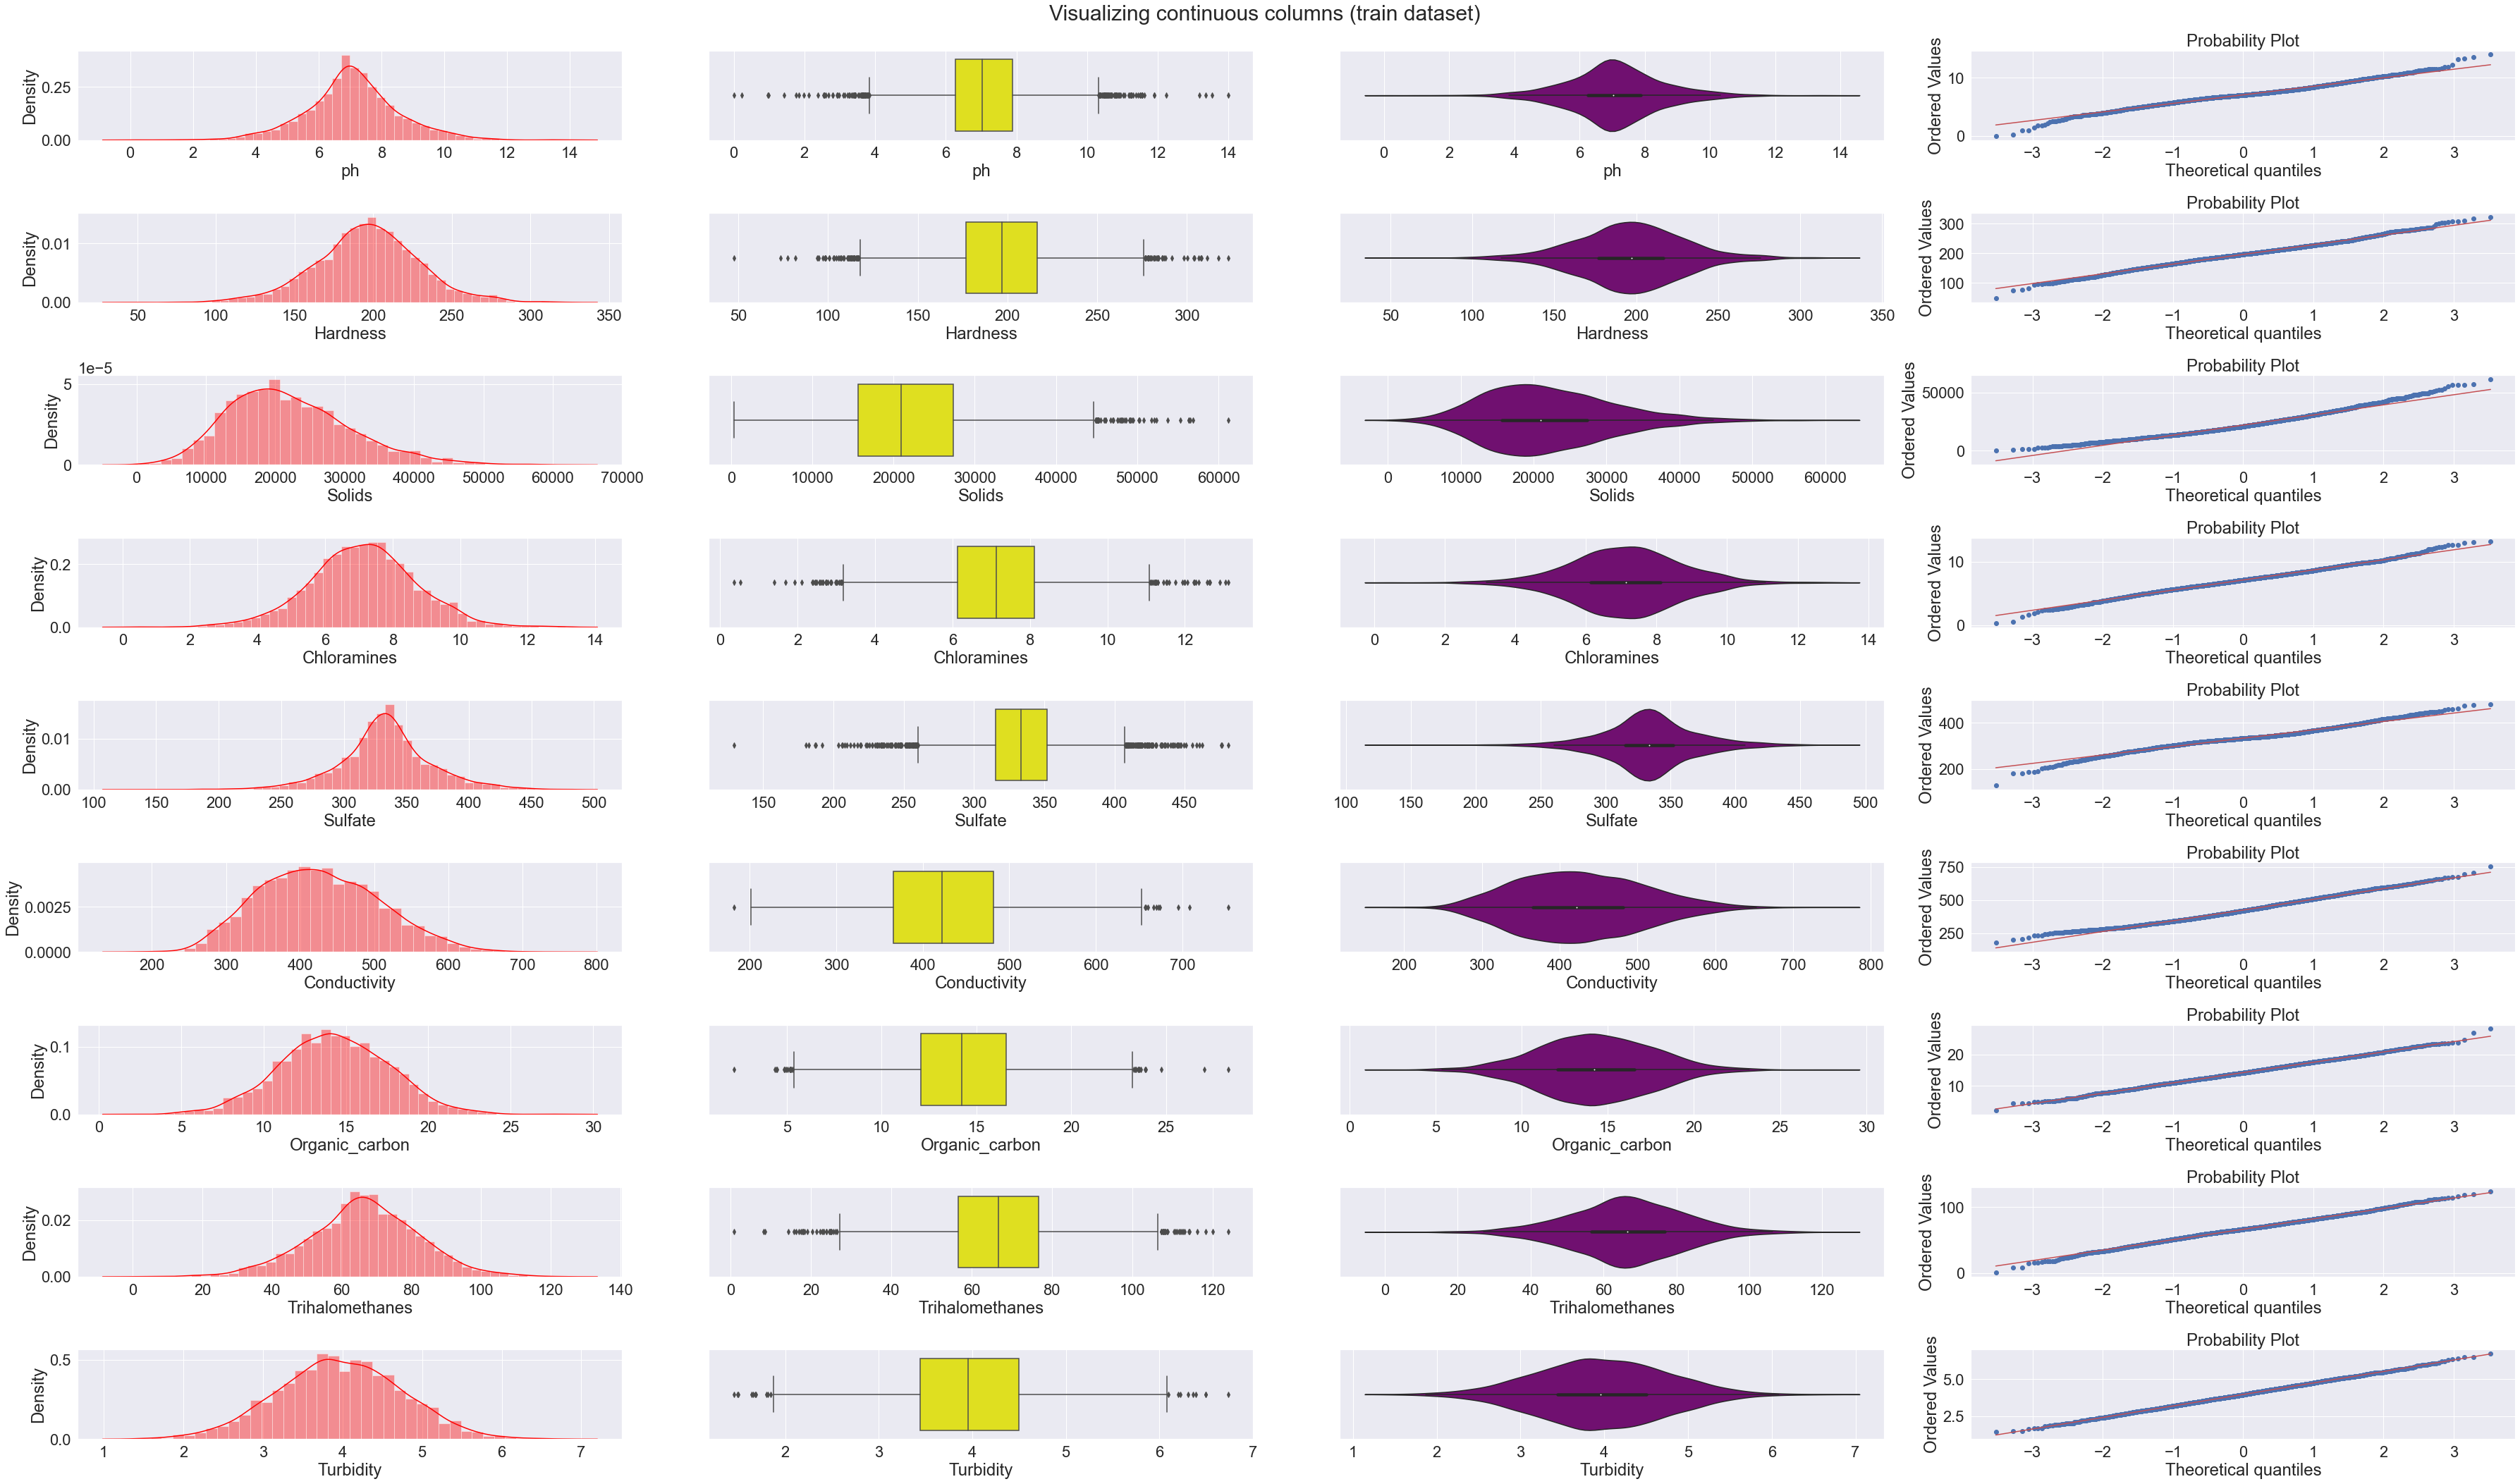

In [52]:
# Now analyze the distribution of the data. We can see from the df info that except for Potability, other values are all continuous.
# continuous features
continuous_features=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
from scipy import stats

fig,ax = plt.subplots(len(continuous_features),4,figsize=(50,30))
for index,cl_name in enumerate(continuous_features):
    sns.distplot(df1[cl_name],ax=ax[index,0],color='red')
    sns.boxplot(df1[cl_name],ax=ax[index,1],color='yellow')
    sns.violinplot(df1[cl_name],ax=ax[index,2],color='purple')
    stats.probplot(df1[cl_name],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)


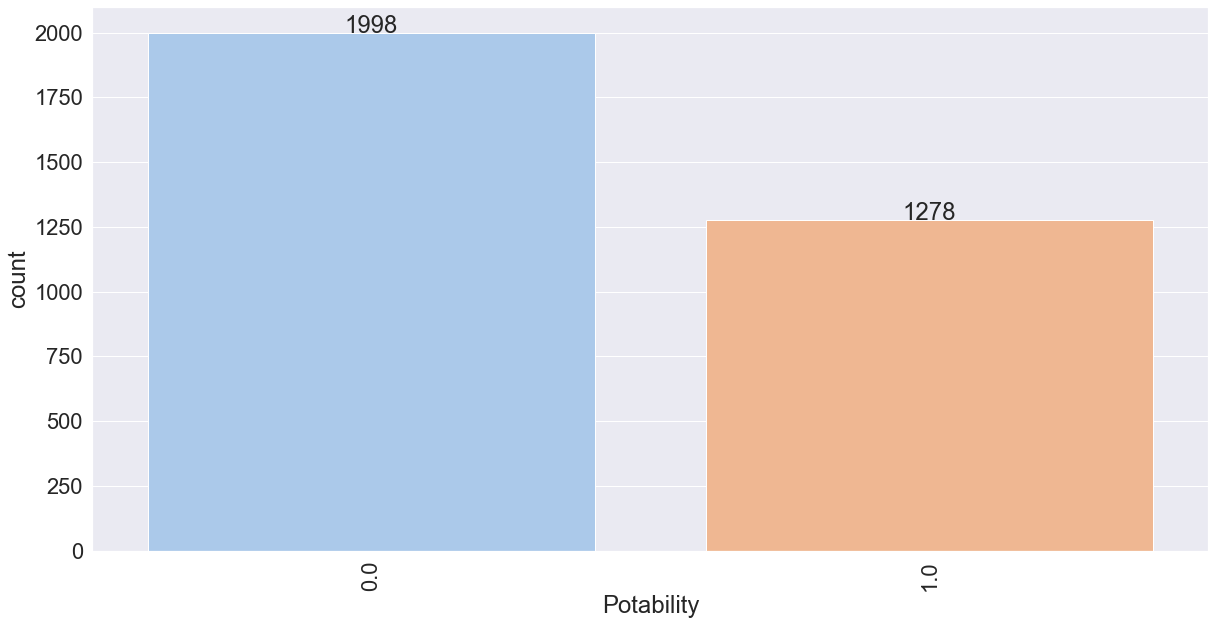

In [53]:
# discrete features: Potability
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x = 'Potability' , data = df1,palette='pastel')
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [55]:
# Check if the distribution is Gaussian
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in continuous_features:
	stat, p = shapiro(df1[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print(f'Sample looks Gaussian with {feature} (fail to reject H0)')
	else:
		print(f'Sample does not look Gaussian with {feature} (reject H0)')

Statistics=0.987, p=0.000
Sample does not look Gaussian with ph (reject H0)
Statistics=0.996, p=0.000
Sample does not look Gaussian with Hardness (reject H0)
Statistics=0.978, p=0.000
Sample does not look Gaussian with Solids (reject H0)
Statistics=0.997, p=0.000
Sample does not look Gaussian with Chloramines (reject H0)
Statistics=0.980, p=0.000
Sample does not look Gaussian with Sulfate (reject H0)
Statistics=0.993, p=0.000
Sample does not look Gaussian with Conductivity (reject H0)
Statistics=1.000, p=0.620
Sample looks Gaussian with Organic_carbon (fail to reject H0)
Statistics=0.998, p=0.000
Sample does not look Gaussian with Trihalomethanes (reject H0)
Statistics=1.000, p=0.931
Sample looks Gaussian with Turbidity (fail to reject H0)


In [57]:
# Since most of the features are not distributed according to the normal distribution law, use the Mann-Whitney U test
from scipy.stats import mannwhitneyu
for feature in continuous_features:
    stat, p = mannwhitneyu(df1['Potability'], df1[feature])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('There are no significant differences (fail to reject H0)')   
    else:
		    print('The sample distributions are not equal (reject H0)')

Statistics=6111.000, p=0.000
The sample distributions are not equal (reject H0)
Statistics=0.000, p=0.000
The sample distributions are not equal (reject H0)
Statistics=0.000, p=0.000
The sample distributions are not equal (reject H0)
Statistics=2556.000, p=0.000
The sample distributions are not equal (reject H0)
Statistics=0.000, p=0.000
The sample distributions are not equal (reject H0)
Statistics=0.000, p=0.000
The sample distributions are not equal (reject H0)
Statistics=0.000, p=0.000
The sample distributions are not equal (reject H0)
Statistics=1278.000, p=0.000
The sample distributions are not equal (reject H0)
Statistics=0.000, p=0.000
The sample distributions are not equal (reject H0)


In [60]:
# Build correlation matrix
correlation = df1.corr()
print(correlation['Potability'].sort_values(ascending = False),'\n')

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.008309
Turbidity          0.001581
ph                -0.003382
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020383
Organic_carbon    -0.030001
Name: Potability, dtype: float64 



Index(['Potability', 'Solids', 'Chloramines', 'Trihalomethanes', 'Turbidity',
       'ph', 'Conductivity', 'Hardness', 'Sulfate', 'Organic_carbon'],
      dtype='object')


<AxesSubplot:>

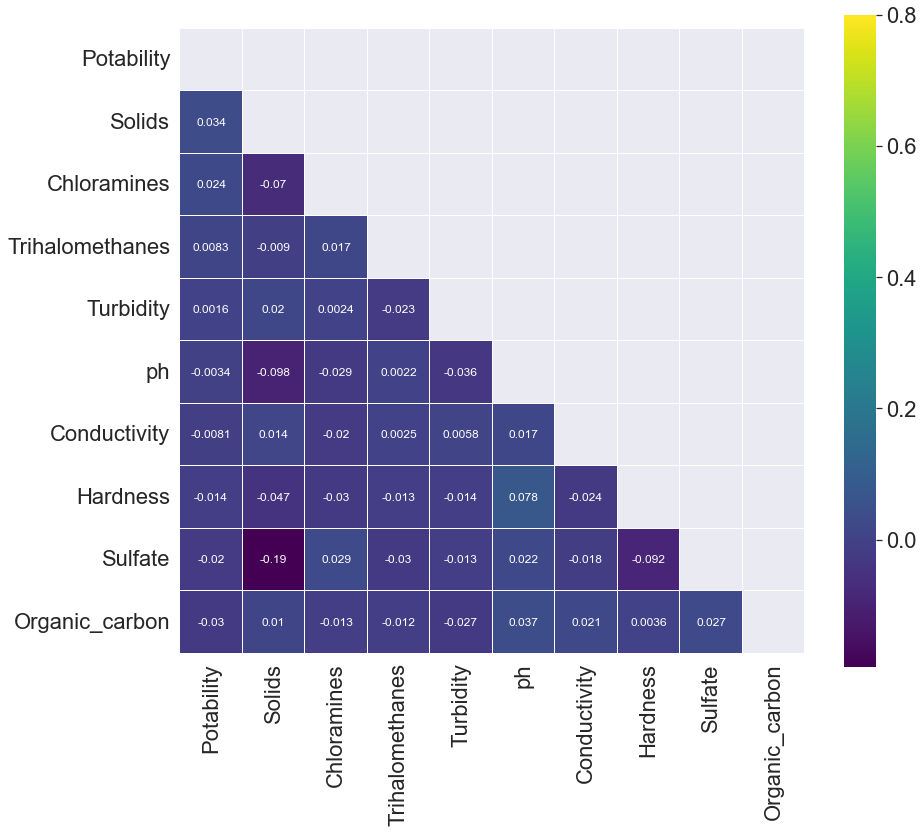

In [61]:
k= 18
cols = correlation.nlargest(k,'Potability')['Potability'].index
print(cols)
cm = np.corrcoef(df1[cols].values.T)
mask = np.triu(np.ones_like(df1.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

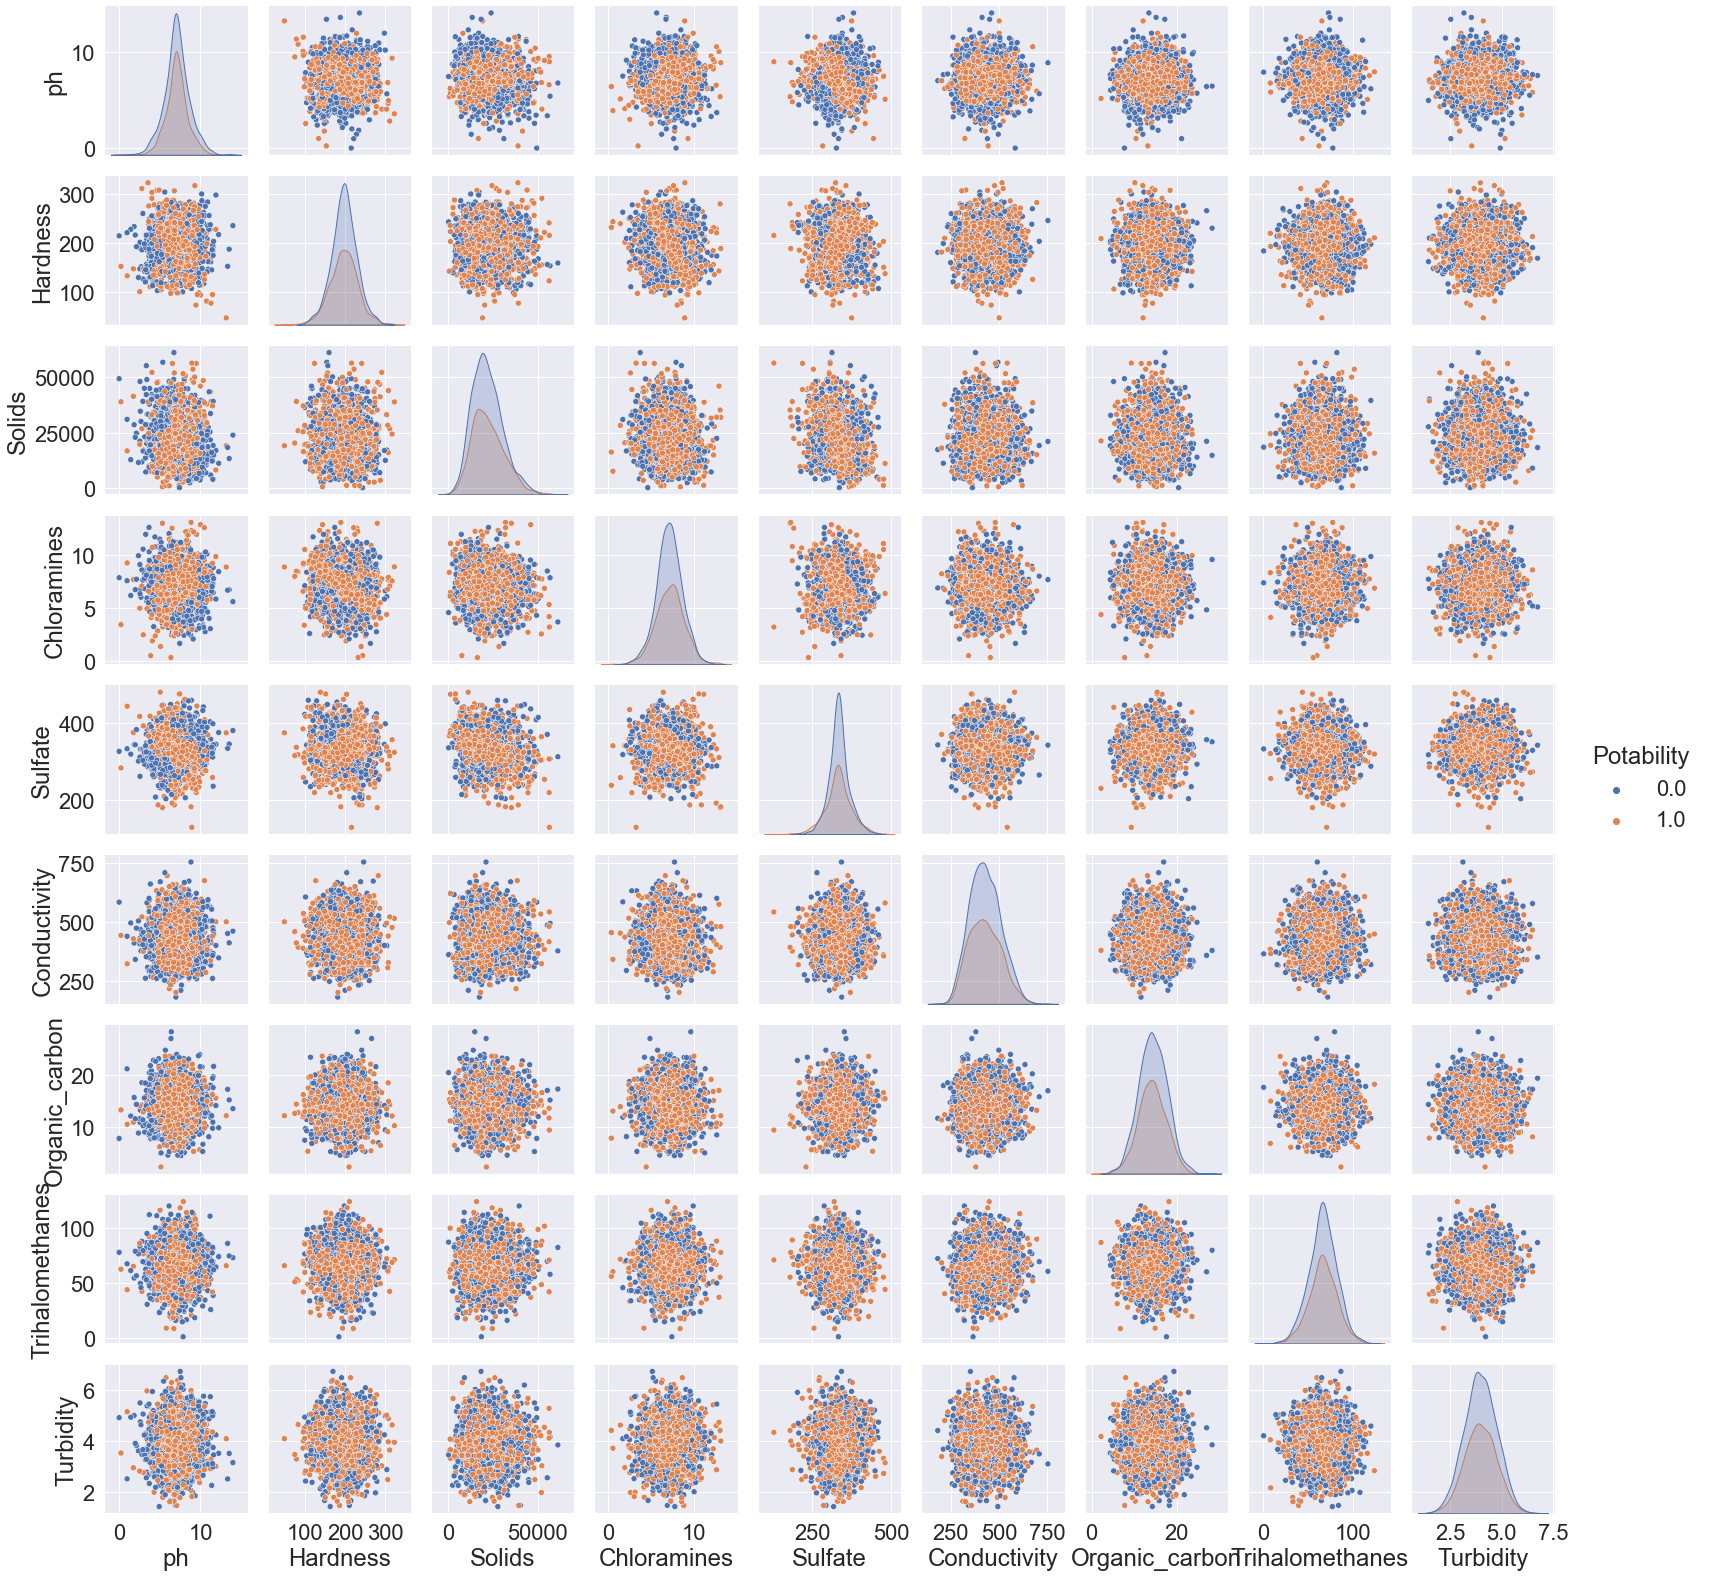

In [59]:
sns.pairplot(data = df1,hue='Potability')

In [63]:
# Check if we need to eliminate any outlier points
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
out_pred = clf.fit_predict(df1)
df1['Out']=out_pred
# out_pred=0 for outlier points
out=df1[df1['Out']!=1]
print(out.shape)
# eliminate the outlier points
df2=df1[df1['Out']==1]
df2=df2.drop('Out',axis=1)
df2


(54, 11)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.585666,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.993634,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,323.240588,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,326.904351,392.449580,19.903225,67.157628,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,335.990170,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,344.831137,402.883113,11.168946,77.488213,4.708658,1.0


In [77]:
# Dataset Split
from sklearn.model_selection import train_test_split as tts
x = df2.drop(['Potability'],axis=True)
y = df2['Potability']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3, random_state = 50)

In [111]:
# Machine Learning Part
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

Acc_logi:  0.6142709410548087
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       595
         1.0       0.00      0.00      0.00       372

    accuracy                           0.61       967
   macro avg       0.31      0.50      0.38       967
weighted avg       0.38      0.61      0.47       967



Text(0.5, 1.0, 'Logi Confusion Matrix')

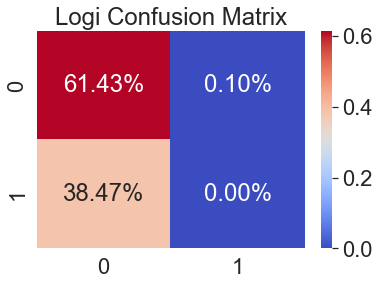

In [145]:
# Logistic Regression
logi = LogisticRegression(max_iter = 120, random_state=0,n_jobs=20)
logi.fit(x_train,y_train)
predlogi_y = logi.predict(x_test)
Acc_logi= accuracy_score(predlogi_y,y_test)
Y_score_logi = logi.decision_function(x_test)
fpr_logi, tpr_logi, thresholds_logi = roc_curve(y_test, Y_score_logi, pos_label=1)
print("Acc_logi: ",Acc_logi)
print(classification_report(y_test,predlogi_y))
cmr= confusion_matrix(y_test,predlogi_y)
sns.heatmap(cmr/np.sum(cmr), annot= True, fmt= '0.2%', cmap= 'coolwarm')
plt.title('Logi Confusion Matrix')


Acc_svm:  0.6153050672182007
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.76       595
         1.0       0.00      0.00      0.00       372

    accuracy                           0.62       967
   macro avg       0.31      0.50      0.38       967
weighted avg       0.38      0.62      0.47       967



Text(0.5, 1.0, 'SVM Confusion Matrix')

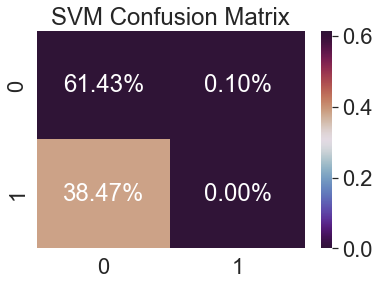

In [146]:
# SVM
svm=SVC()
svm.fit(x_train,y_train)
predsvm_y=svm.predict(x_test)
Acc_svm= accuracy_score(predsvm_y,y_test)
Y_score_svm = svm.decision_function(x_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, Y_score_svm, pos_label=1)
print("Acc_svm: ",Acc_svm)
print(classification_report(y_test,predsvm_y))
cmr= confusion_matrix(y_test,predlogi_y)
sns.heatmap(cmr/np.sum(cmr), annot= True, fmt= '0.2%', cmap= 'twilight_shifted')
plt.title('SVM Confusion Matrix')

Acc_rfc:  0.6525336091003102
              precision    recall  f1-score   support

         0.0       0.88      0.66      0.76       785
         1.0       0.29      0.60      0.39       182

    accuracy                           0.65       967
   macro avg       0.59      0.63      0.58       967
weighted avg       0.77      0.65      0.69       967



Text(0.5, 1.0, 'RFC Confusion Matrix')

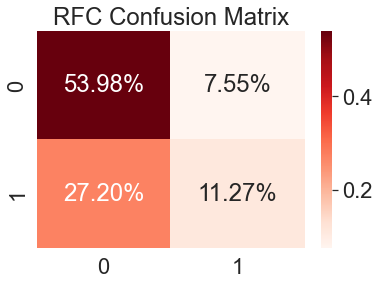

In [147]:
# Random Forest
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_RFC = RFC.predict(x_test)
Acc_rfc= accuracy_score(y_RFC,y_test)
Y_score_RFC = RFC.fit(x_train, y_train).predict_proba(x_test)
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, Y_score_RFC[:,1], pos_label=1)
print( "Acc_rfc: ",Acc_rfc)
print(classification_report(y_RFC,y_test))
cmr= confusion_matrix(y_test,y_RFC)
sns.heatmap(cmr/np.sum(cmr), annot= True, fmt= '0.2%', cmap= 'Reds')
plt.title('RFC Confusion Matrix')

0.5584281282316442
              precision    recall  f1-score   support

         0.0       0.62      0.75      0.68       595
         1.0       0.39      0.26      0.31       372

    accuracy                           0.56       967
   macro avg       0.50      0.50      0.49       967
weighted avg       0.53      0.56      0.53       967



Text(0.5, 1.0, 'KN Confusion Matrix')

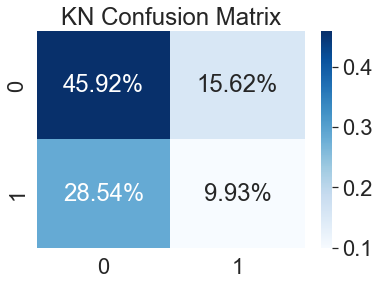

In [148]:
# K-Neighbors
Kn = KNeighborsClassifier(n_neighbors= 9, leaf_size = 20)
Kn.fit(x_train,y_train)
pred_Kn =Kn.predict(x_test)
Acc_Kn = accuracy_score(y_test,pred_Kn)
Y_score_Kn = Kn.fit(x_train, y_train).predict_proba(x_test)
fpr_Kn, tpr_Kn, thresholds_Kn = roc_curve(y_test, Y_score_Kn[:,1], pos_label=1)
print(Acc_Kn)
print(classification_report(y_test, pred_Kn))
cmk = confusion_matrix(y_test,pred_Kn)
sns.heatmap(cmk/np.sum(cmk), annot= True, fmt= '0.2%', cmap= 'Blues')
plt.title('KN Confusion Matrix')

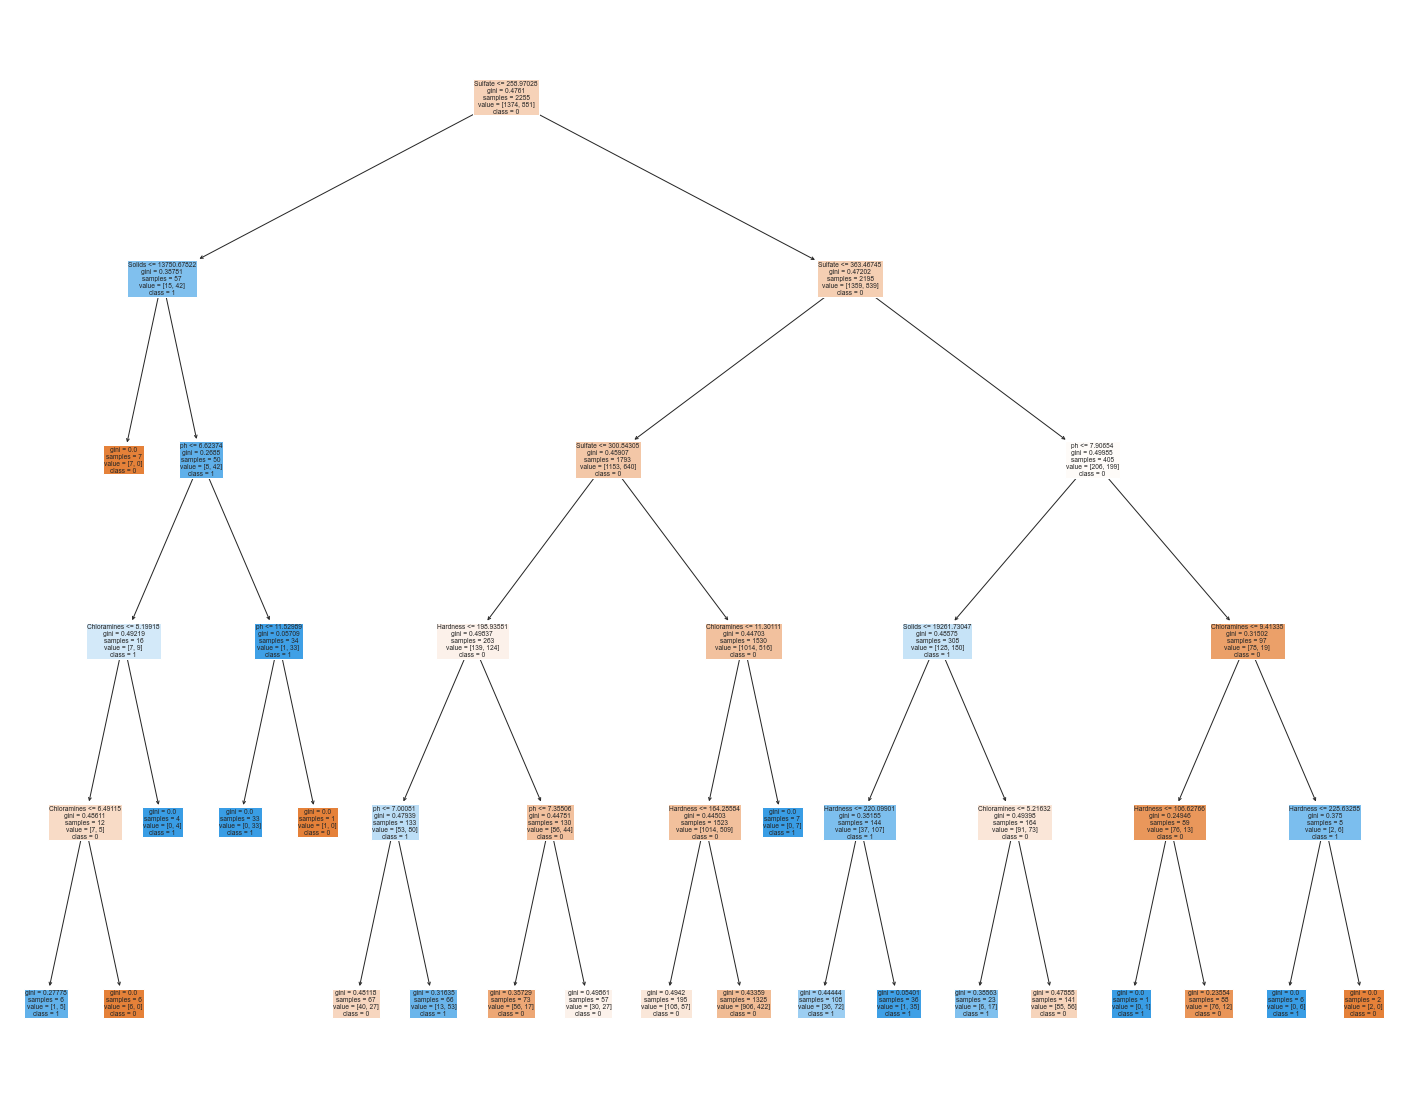

In [133]:
# Decision Tree
Decision_Tree = DecisionTreeClassifier(max_depth = 5)
Decision_Tree.fit(x_train, y_train)
pred_DT = Decision_Tree.predict(x_test)
Y_score_DT = Decision_Tree.fit(x_train, y_train).predict_proba(x_test)
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, Y_score_DT[:,1], pos_label=1)
# Visualize Decision Tree
plt.figure(figsize = (25,20))
tree.plot_tree(Decision_Tree,
               feature_names =  df2.columns.tolist()[:-1],
               class_names = ["0", "1"],
               filled = True,
               precision = 5)
plt.show()

0.6318510858324715
              precision    recall  f1-score   support

         0.0       0.64      0.92      0.76       595
         1.0       0.58      0.16      0.26       372

    accuracy                           0.63       967
   macro avg       0.61      0.54      0.51       967
weighted avg       0.61      0.63      0.56       967



Text(0.5, 1.0, 'DT Confusion Matrix')

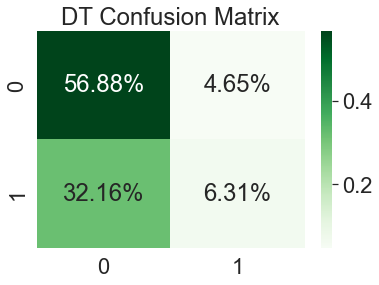

In [149]:
Acc_DT = accuracy_score(y_test,pred_DT)
print(Acc_DT)
print(classification_report(y_test, pred_DT))
cmk = confusion_matrix(y_test,pred_DT)
sns.heatmap(cmk/np.sum(cmk), annot= True, fmt= '0.2%', cmap= 'Greens')
plt.title('DT Confusion Matrix')

<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

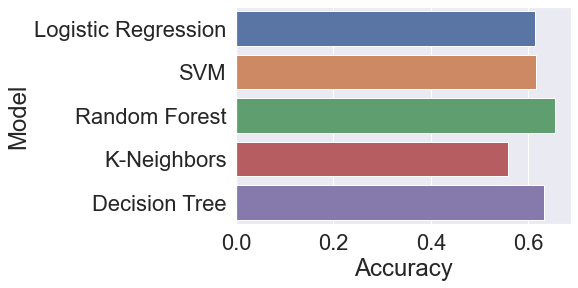

In [104]:
# Final Report
models = pd.DataFrame({"Model":['Logistic Regression','SVM','Random Forest','K-Neighbors','Decision Tree'],
           "Accuracy":[Acc_logi,Acc_svm,Acc_rfc,Acc_Kn,Acc_DT]})
models.sort_values(by='Accuracy', ascending=False)
sns.barplot(x= 'Accuracy', y= 'Model', data= models)

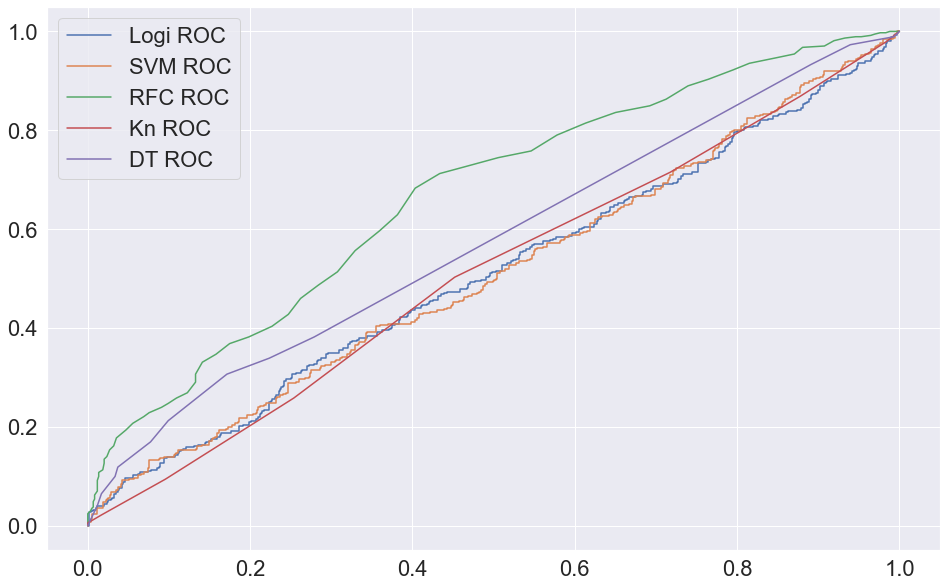

In [139]:
# Compare the ROC Curve of these five methods
fig=plt.figure(figsize=(16,10))
plt.plot(fpr_logi, tpr_logi,label='Logi ROC')
plt.plot(fpr_svm, tpr_svm,label='SVM ROC')
plt.plot(fpr_RFC, tpr_RFC, label='RFC ROC')
plt.plot(fpr_Kn, tpr_Kn, label='Kn ROC')
plt.plot(fpr_DT, tpr_DT, label='DT ROC')
plt.legend()
plt.show()

